In [1]:
from pandas import read_csv
import numpy 
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from pandas import DataFrame
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score
import random
import pylab as pl
import csv

/home/user/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
series = read_csv('newmonthlycopy.csv')
X = series.values
print(series.columns)
print(series)
print(series.describe())

Index(['Month', 'Fuel Oil Consumption',
       'Asphalt and Road Oil Product Supplied',
       'Cooling Degree Days U.S. Average',
       'Heating Degree Days U.S. Average '],
      dtype='object')
       Month  Fuel Oil Consumption  Asphalt and Road Oil Product Supplied  \
0    2000-01                  0.82                                   0.24   
1    2000-02                  0.81                                   0.33   
2    2000-03                  0.56                                   0.38   
3    2000-04                  0.46                                   0.44   
4    2000-05                  0.40                                   0.64   
5    2000-06                  0.37                                   0.74   
6    2000-07                  0.32                                   0.70   
7    2000-08                  0.40                                   0.81   
8    2000-09                  0.44                                   0.71   
9    2000-10                  0.

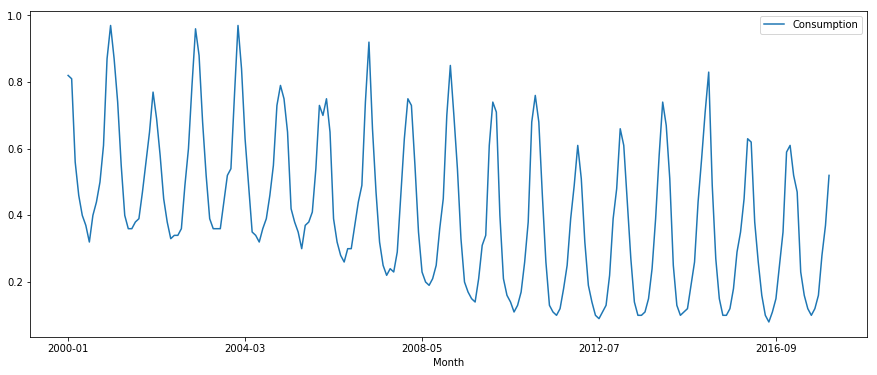

In [3]:
series.plot(x='Month',y='Fuel Oil Consumption',label='Consumption')
#series.plot(x='Month',y='Cooling Degree Days U.S. Average',label='Climate-Cooling Degree Days')
#series.plot(x='Month',y='Heating Degree Days U.S. Average',label='Climate-Heating Degree Days')
pyplot.show(block=False)

In [4]:
X=series['Month'].values
print(X)

['2000-01' '2000-02' '2000-03' '2000-04' '2000-05' '2000-06' '2000-07'
 '2000-08' '2000-09' '2000-10' '2000-11' '2000-12' '2001-01' '2001-02'
 '2001-03' '2001-04' '2001-05' '2001-06' '2001-07' '2001-08' '2001-09'
 '2001-10' '2001-11' '2001-12' '2002-01' '2002-02' '2002-03' '2002-04'
 '2002-05' '2002-06' '2002-07' '2002-08' '2002-09' '2002-10' '2002-11'
 '2002-12' '2003-01' '2003-02' '2003-03' '2003-04' '2003-05' '2003-06'
 '2003-07' '2003-08' '2003-09' '2003-10' '2003-11' '2003-12' '2004-01'
 '2004-02' '2004-03' '2004-04' '2004-05' '2004-06' '2004-07' '2004-08'
 '2004-09' '2004-10' '2004-11' '2004-12' '2005-01' '2005-02' '2005-03'
 '2005-04' '2005-05' '2005-06' '2005-07' '2005-08' '2005-09' '2005-10'
 '2005-11' '2005-12' '2006-01' '2006-02' '2006-03' '2006-04' '2006-05'
 '2006-06' '2006-07' '2006-08' '2006-09' '2006-10' '2006-11' '2006-12'
 '2007-01' '2007-02' '2007-03' '2007-04' '2007-05' '2007-06' '2007-07'
 '2007-08' '2007-09' '2007-10' '2007-11' '2007-12' '2008-01' '2008-02'
 '2008

In [5]:
len(X)

216

In [6]:
X=series['Fuel Oil Consumption'].values
print(X)

[ 0.82  0.81  0.56  0.46  0.4   0.37  0.32  0.4   0.44  0.5   0.61  0.87
  0.97  0.87  0.74  0.55  0.4   0.36  0.36  0.38  0.39  0.47  0.56  0.65
  0.77  0.69  0.58  0.45  0.38  0.33  0.34  0.34  0.36  0.49  0.6   0.79
  0.96  0.88  0.68  0.52  0.39  0.36  0.36  0.36  0.44  0.52  0.54  0.76
  0.97  0.84  0.63  0.49  0.35  0.34  0.32  0.36  0.39  0.46  0.55  0.73
  0.79  0.75  0.65  0.42  0.38  0.35  0.3   0.37  0.38  0.41  0.54  0.73
  0.7   0.75  0.65  0.39  0.32  0.28  0.26  0.3   0.3   0.37  0.44  0.49
  0.74  0.92  0.66  0.47  0.32  0.25  0.22  0.24  0.23  0.29  0.46  0.63
  0.75  0.73  0.55  0.35  0.23  0.2   0.19  0.21  0.25  0.36  0.45  0.7
  0.85  0.7   0.54  0.33  0.2   0.17  0.15  0.14  0.21  0.31  0.34  0.61
  0.74  0.71  0.4   0.21  0.16  0.14  0.11  0.13  0.17  0.26  0.38  0.68
  0.76  0.68  0.46  0.26  0.13  0.11  0.1   0.12  0.18  0.25  0.39  0.49
  0.61  0.51  0.32  0.19  0.14  0.1   0.09  0.11  0.13  0.22  0.39  0.48
  0.66  0.61  0.44  0.27  0.14  0.1   0.1   0.11  0.

[ 0.82  0.81  0.56  0.46  0.4   0.37  0.32  0.4   0.44  0.5   0.61  0.87
  0.97  0.87  0.74  0.55  0.4   0.36  0.36  0.38  0.39  0.47  0.56  0.65
  0.77  0.69  0.58  0.45  0.38  0.33  0.34  0.34  0.36  0.49  0.6   0.79
  0.96  0.88  0.68  0.52  0.39  0.36  0.36  0.36  0.44  0.52  0.54  0.76]
[ 0.82  0.81  0.56  0.46  0.4   0.37  0.32  0.4   0.44  0.5   0.61  0.87
  0.97  0.87  0.74  0.55  0.4   0.36  0.36  0.38  0.39  0.47  0.56  0.65
  0.77  0.69  0.58  0.45  0.38  0.33  0.34  0.34  0.36  0.49  0.6   0.79]
[ 0.96  0.88  0.68  0.52  0.39  0.36  0.36  0.36  0.44  0.52  0.54  0.76]
predicted=0.868649, expected=0.960000
predicted=0.984499, expected=0.880000
predicted=0.711733, expected=0.680000
predicted=0.473360, expected=0.520000
predicted=0.401823, expected=0.390000
predicted=0.335818, expected=0.360000
predicted=0.396274, expected=0.360000
predicted=0.418477, expected=0.360000
predicted=0.415778, expected=0.440000
predicted=0.535792, expected=0.520000
predicted=0.590626, expected=0.54

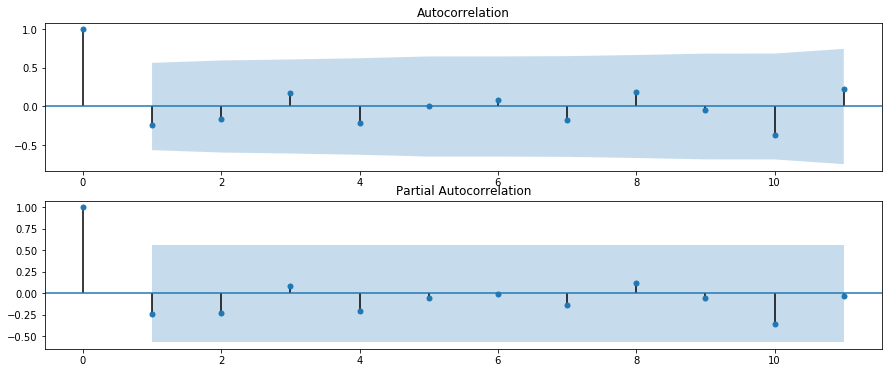

[ 0.97  0.87  0.74  0.55  0.4   0.36  0.36  0.38  0.39  0.47  0.56  0.65
  0.77  0.69  0.58  0.45  0.38  0.33  0.34  0.34  0.36  0.49  0.6   0.79
  0.96  0.88  0.68  0.52  0.39  0.36  0.36  0.36  0.44  0.52  0.54  0.76
  0.97  0.84  0.63  0.49  0.35  0.34  0.32  0.36  0.39  0.46  0.55  0.73]
[ 0.97  0.87  0.74  0.55  0.4   0.36  0.36  0.38  0.39  0.47  0.56  0.65
  0.77  0.69  0.58  0.45  0.38  0.33  0.34  0.34  0.36  0.49  0.6   0.79
  0.96  0.88  0.68  0.52  0.39  0.36  0.36  0.36  0.44  0.52  0.54  0.76]
[ 0.97  0.84  0.63  0.49  0.35  0.34  0.32  0.36  0.39  0.46  0.55  0.73]
predicted=0.894624, expected=0.970000
predicted=1.049869, expected=0.840000
predicted=0.640267, expected=0.630000
predicted=0.428591, expected=0.490000
predicted=0.396877, expected=0.350000
predicted=0.297866, expected=0.340000
predicted=0.400244, expected=0.320000
predicted=0.373951, expected=0.360000
predicted=0.449943, expected=0.390000
predicted=0.459995, expected=0.460000
predicted=0.541709, expected=0.55

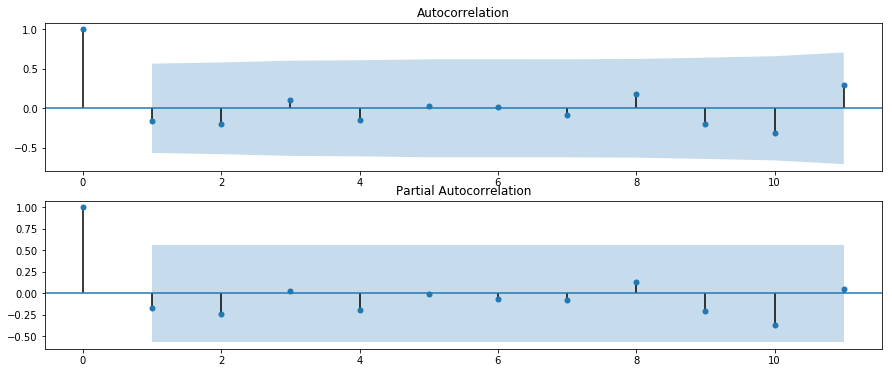

[ 0.77  0.69  0.58  0.45  0.38  0.33  0.34  0.34  0.36  0.49  0.6   0.79
  0.96  0.88  0.68  0.52  0.39  0.36  0.36  0.36  0.44  0.52  0.54  0.76
  0.97  0.84  0.63  0.49  0.35  0.34  0.32  0.36  0.39  0.46  0.55  0.73
  0.79  0.75  0.65  0.42  0.38  0.35  0.3   0.37  0.38  0.41  0.54  0.73]
[ 0.77  0.69  0.58  0.45  0.38  0.33  0.34  0.34  0.36  0.49  0.6   0.79
  0.96  0.88  0.68  0.52  0.39  0.36  0.36  0.36  0.44  0.52  0.54  0.76
  0.97  0.84  0.63  0.49  0.35  0.34  0.32  0.36  0.39  0.46  0.55  0.73]
[ 0.79  0.75  0.65  0.42  0.38  0.35  0.3   0.37  0.38  0.41  0.54  0.73]
predicted=0.816852, expected=0.790000
predicted=0.761904, expected=0.750000
predicted=0.655243, expected=0.650000
predicted=0.539180, expected=0.420000
predicted=0.272155, expected=0.380000
predicted=0.403920, expected=0.350000
predicted=0.389145, expected=0.300000
predicted=0.335255, expected=0.370000
predicted=0.477579, expected=0.380000
predicted=0.433831, expected=0.410000
predicted=0.468941, expected=0.54

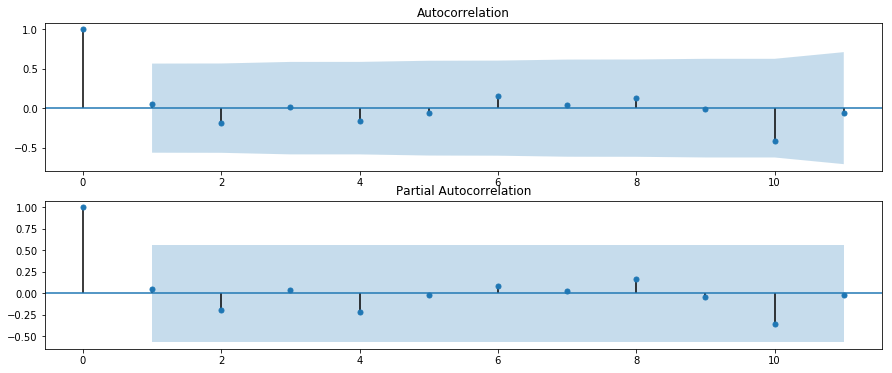

[ 0.96  0.88  0.68  0.52  0.39  0.36  0.36  0.36  0.44  0.52  0.54  0.76
  0.97  0.84  0.63  0.49  0.35  0.34  0.32  0.36  0.39  0.46  0.55  0.73
  0.79  0.75  0.65  0.42  0.38  0.35  0.3   0.37  0.38  0.41  0.54  0.73
  0.7   0.75  0.65  0.39  0.32  0.28  0.26  0.3   0.3   0.37  0.44  0.49]
[ 0.96  0.88  0.68  0.52  0.39  0.36  0.36  0.36  0.44  0.52  0.54  0.76
  0.97  0.84  0.63  0.49  0.35  0.34  0.32  0.36  0.39  0.46  0.55  0.73
  0.79  0.75  0.65  0.42  0.38  0.35  0.3   0.37  0.38  0.41  0.54  0.73]
[ 0.7   0.75  0.65  0.39  0.32  0.28  0.26  0.3   0.3   0.37  0.44  0.49]
predicted=0.823405, expected=0.700000
predicted=0.625881, expected=0.750000
predicted=0.727462, expected=0.650000
predicted=0.544228, expected=0.390000
predicted=0.237142, expected=0.320000
predicted=0.341510, expected=0.280000
predicted=0.333229, expected=0.260000
predicted=0.329408, expected=0.300000
predicted=0.399121, expected=0.300000
predicted=0.363884, expected=0.370000
predicted=0.464225, expected=0.44

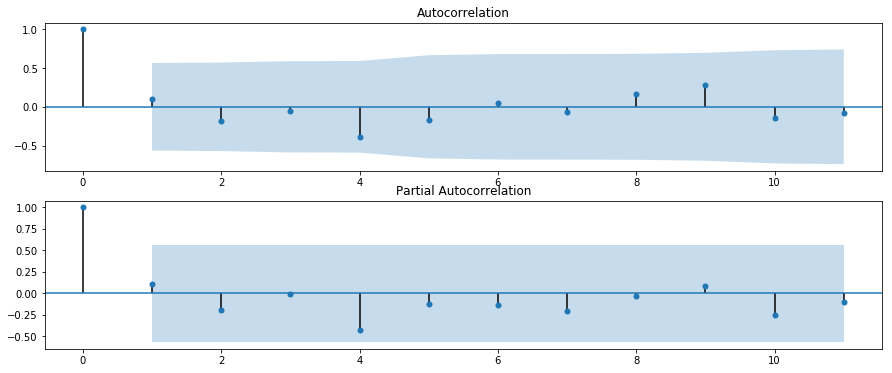

[ 0.97  0.84  0.63  0.49  0.35  0.34  0.32  0.36  0.39  0.46  0.55  0.73
  0.79  0.75  0.65  0.42  0.38  0.35  0.3   0.37  0.38  0.41  0.54  0.73
  0.7   0.75  0.65  0.39  0.32  0.28  0.26  0.3   0.3   0.37  0.44  0.49
  0.74  0.92  0.66  0.47  0.32  0.25  0.22  0.24  0.23  0.29  0.46  0.63]
[ 0.97  0.84  0.63  0.49  0.35  0.34  0.32  0.36  0.39  0.46  0.55  0.73
  0.79  0.75  0.65  0.42  0.38  0.35  0.3   0.37  0.38  0.41  0.54  0.73
  0.7   0.75  0.65  0.39  0.32  0.28  0.26  0.3   0.3   0.37  0.44  0.49]
[ 0.74  0.92  0.66  0.47  0.32  0.25  0.22  0.24  0.23  0.29  0.46  0.63]
predicted=0.530898, expected=0.740000
predicted=0.869804, expected=0.920000
predicted=0.958360, expected=0.660000
predicted=0.419533, expected=0.470000
predicted=0.351675, expected=0.320000
predicted=0.276419, expected=0.250000
predicted=0.284237, expected=0.220000
predicted=0.287975, expected=0.240000
predicted=0.333655, expected=0.230000
predicted=0.298501, expected=0.290000
predicted=0.389207, expected=0.46

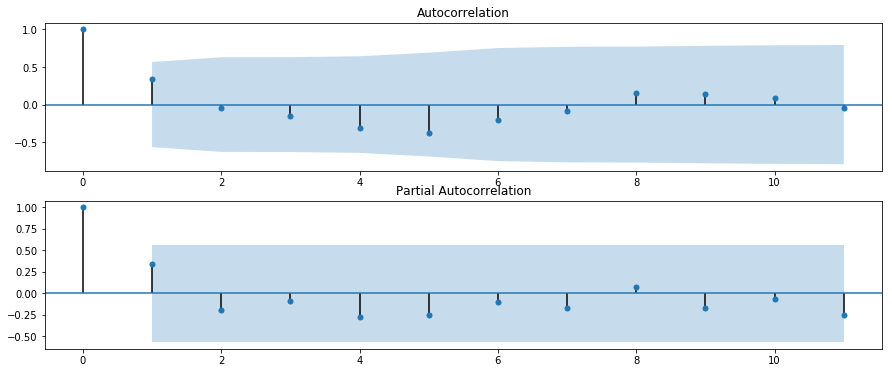

[ 0.79  0.75  0.65  0.42  0.38  0.35  0.3   0.37  0.38  0.41  0.54  0.73
  0.7   0.75  0.65  0.39  0.32  0.28  0.26  0.3   0.3   0.37  0.44  0.49
  0.74  0.92  0.66  0.47  0.32  0.25  0.22  0.24  0.23  0.29  0.46  0.63
  0.75  0.73  0.55  0.35  0.23  0.2   0.19  0.21  0.25  0.36  0.45  0.7 ]
[ 0.79  0.75  0.65  0.42  0.38  0.35  0.3   0.37  0.38  0.41  0.54  0.73
  0.7   0.75  0.65  0.39  0.32  0.28  0.26  0.3   0.3   0.37  0.44  0.49
  0.74  0.92  0.66  0.47  0.32  0.25  0.22  0.24  0.23  0.29  0.46  0.63]
[ 0.75  0.73  0.55  0.35  0.23  0.2   0.19  0.21  0.25  0.36  0.45  0.7 ]
predicted=0.691170, expected=0.750000
predicted=0.743620, expected=0.730000
predicted=0.635489, expected=0.550000
predicted=0.400432, expected=0.350000
predicted=0.251513, expected=0.230000
predicted=0.228648, expected=0.200000
predicted=0.271344, expected=0.190000
predicted=0.273279, expected=0.210000
predicted=0.303527, expected=0.250000
predicted=0.341512, expected=0.360000
predicted=0.466864, expected=0.45

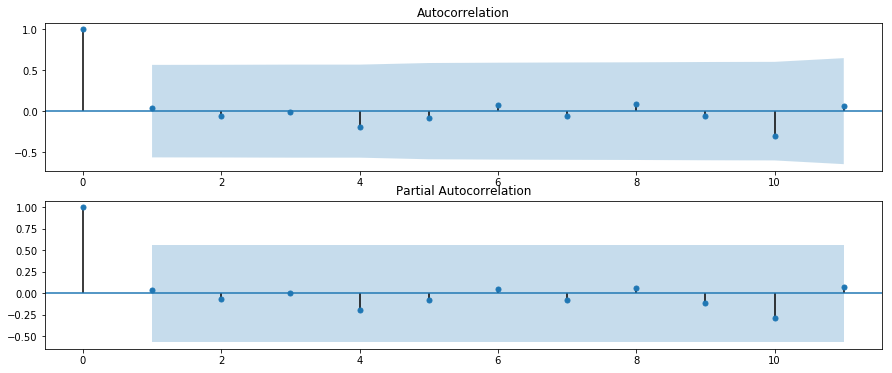

[ 0.7   0.75  0.65  0.39  0.32  0.28  0.26  0.3   0.3   0.37  0.44  0.49
  0.74  0.92  0.66  0.47  0.32  0.25  0.22  0.24  0.23  0.29  0.46  0.63
  0.75  0.73  0.55  0.35  0.23  0.2   0.19  0.21  0.25  0.36  0.45  0.7
  0.85  0.7   0.54  0.33  0.2   0.17  0.15  0.14  0.21  0.31  0.34  0.61]
[ 0.7   0.75  0.65  0.39  0.32  0.28  0.26  0.3   0.3   0.37  0.44  0.49
  0.74  0.92  0.66  0.47  0.32  0.25  0.22  0.24  0.23  0.29  0.46  0.63
  0.75  0.73  0.55  0.35  0.23  0.2   0.19  0.21  0.25  0.36  0.45  0.7 ]
[ 0.85  0.7   0.54  0.33  0.2   0.17  0.15  0.14  0.21  0.31  0.34  0.61]
predicted=0.801664, expected=0.850000
predicted=0.829144, expected=0.700000
predicted=0.486240, expected=0.540000
predicted=0.383833, expected=0.330000
predicted=0.207554, expected=0.200000
predicted=0.186059, expected=0.170000
predicted=0.243276, expected=0.150000
predicted=0.232075, expected=0.140000
predicted=0.226990, expected=0.210000
predicted=0.333698, expected=0.310000
predicted=0.422235, expected=0.340

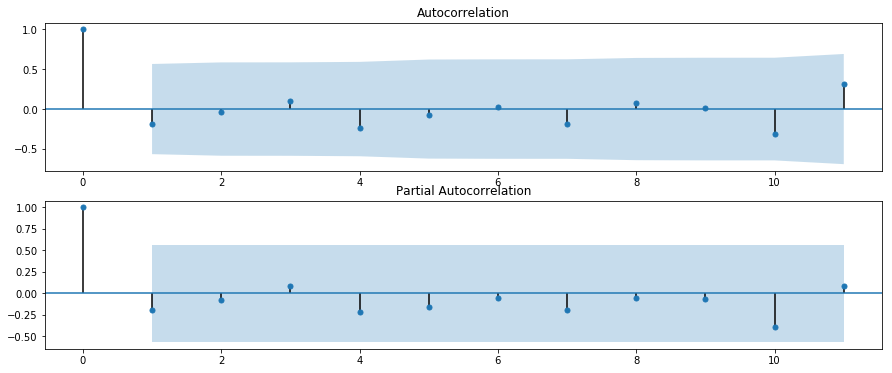

[ 0.74  0.92  0.66  0.47  0.32  0.25  0.22  0.24  0.23  0.29  0.46  0.63
  0.75  0.73  0.55  0.35  0.23  0.2   0.19  0.21  0.25  0.36  0.45  0.7
  0.85  0.7   0.54  0.33  0.2   0.17  0.15  0.14  0.21  0.31  0.34  0.61
  0.74  0.71  0.4   0.21  0.16  0.14  0.11  0.13  0.17  0.26  0.38  0.68]
[ 0.74  0.92  0.66  0.47  0.32  0.25  0.22  0.24  0.23  0.29  0.46  0.63
  0.75  0.73  0.55  0.35  0.23  0.2   0.19  0.21  0.25  0.36  0.45  0.7
  0.85  0.7   0.54  0.33  0.2   0.17  0.15  0.14  0.21  0.31  0.34  0.61]
[ 0.74  0.71  0.4   0.21  0.16  0.14  0.11  0.13  0.17  0.26  0.38  0.68]
predicted=0.760167, expected=0.740000
predicted=0.729984, expected=0.710000
predicted=0.580138, expected=0.400000
predicted=0.141346, expected=0.210000
predicted=0.131045, expected=0.160000
predicted=0.214532, expected=0.140000
predicted=0.221915, expected=0.110000
predicted=0.188067, expected=0.130000
predicted=0.237014, expected=0.170000
predicted=0.275013, expected=0.260000
predicted=0.372965, expected=0.3800

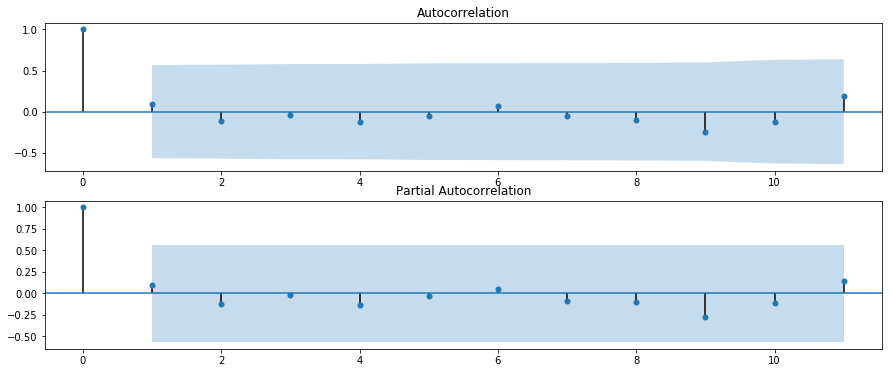

[ 0.75  0.73  0.55  0.35  0.23  0.2   0.19  0.21  0.25  0.36  0.45  0.7
  0.85  0.7   0.54  0.33  0.2   0.17  0.15  0.14  0.21  0.31  0.34  0.61
  0.74  0.71  0.4   0.21  0.16  0.14  0.11  0.13  0.17  0.26  0.38  0.68
  0.76  0.68  0.46  0.26  0.13  0.11  0.1   0.12  0.18  0.25  0.39  0.49]
[ 0.75  0.73  0.55  0.35  0.23  0.2   0.19  0.21  0.25  0.36  0.45  0.7
  0.85  0.7   0.54  0.33  0.2   0.17  0.15  0.14  0.21  0.31  0.34  0.61
  0.74  0.71  0.4   0.21  0.16  0.14  0.11  0.13  0.17  0.26  0.38  0.68]
[ 0.76  0.68  0.46  0.26  0.13  0.11  0.1   0.12  0.18  0.25  0.39  0.49]
predicted=0.831380, expected=0.760000
predicted=0.701952, expected=0.680000
predicted=0.519651, expected=0.460000
predicted=0.255975, expected=0.260000
predicted=0.140681, expected=0.130000
predicted=0.110711, expected=0.110000
predicted=0.186276, expected=0.100000
predicted=0.182578, expected=0.120000
predicted=0.216489, expected=0.180000
predicted=0.287392, expected=0.250000
predicted=0.341684, expected=0.3900

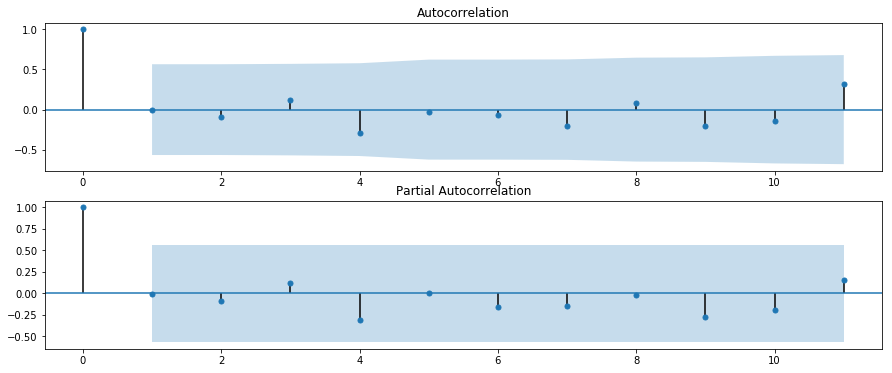

[ 0.85  0.7   0.54  0.33  0.2   0.17  0.15  0.14  0.21  0.31  0.34  0.61
  0.74  0.71  0.4   0.21  0.16  0.14  0.11  0.13  0.17  0.26  0.38  0.68
  0.76  0.68  0.46  0.26  0.13  0.11  0.1   0.12  0.18  0.25  0.39  0.49
  0.61  0.51  0.32  0.19  0.14  0.1   0.09  0.11  0.13  0.22  0.39  0.48]
[ 0.85  0.7   0.54  0.33  0.2   0.17  0.15  0.14  0.21  0.31  0.34  0.61
  0.74  0.71  0.4   0.21  0.16  0.14  0.11  0.13  0.17  0.26  0.38  0.68
  0.76  0.68  0.46  0.26  0.13  0.11  0.1   0.12  0.18  0.25  0.39  0.49]
[ 0.61  0.51  0.32  0.19  0.14  0.1   0.09  0.11  0.13  0.22  0.39  0.48]
predicted=0.532725, expected=0.610000
predicted=0.637417, expected=0.510000
predicted=0.381542, expected=0.320000
predicted=0.173865, expected=0.190000
predicted=0.135562, expected=0.140000
predicted=0.167205, expected=0.100000
predicted=0.144806, expected=0.090000
predicted=0.159537, expected=0.110000
predicted=0.195371, expected=0.130000
predicted=0.206237, expected=0.220000
predicted=0.327520, expected=0.39

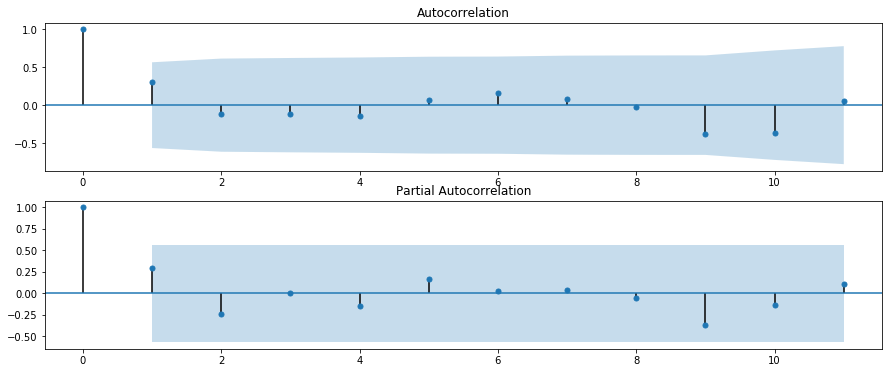

[ 0.74  0.71  0.4   0.21  0.16  0.14  0.11  0.13  0.17  0.26  0.38  0.68
  0.76  0.68  0.46  0.26  0.13  0.11  0.1   0.12  0.18  0.25  0.39  0.49
  0.61  0.51  0.32  0.19  0.14  0.1   0.09  0.11  0.13  0.22  0.39  0.48
  0.66  0.61  0.44  0.27  0.14  0.1   0.1   0.11  0.15  0.24  0.39  0.58]
[ 0.74  0.71  0.4   0.21  0.16  0.14  0.11  0.13  0.17  0.26  0.38  0.68
  0.76  0.68  0.46  0.26  0.13  0.11  0.1   0.12  0.18  0.25  0.39  0.49
  0.61  0.51  0.32  0.19  0.14  0.1   0.09  0.11  0.13  0.22  0.39  0.48]
[ 0.66  0.61  0.44  0.27  0.14  0.1   0.1   0.11  0.15  0.24  0.39  0.58]
predicted=0.500883, expected=0.660000
predicted=0.708408, expected=0.610000
predicted=0.474482, expected=0.440000
predicted=0.257849, expected=0.270000
predicted=0.145500, expected=0.140000
predicted=0.091556, expected=0.100000
predicted=0.140032, expected=0.100000
predicted=0.171264, expected=0.110000
predicted=0.183262, expected=0.150000
predicted=0.233793, expected=0.240000
predicted=0.336781, expected=0.39

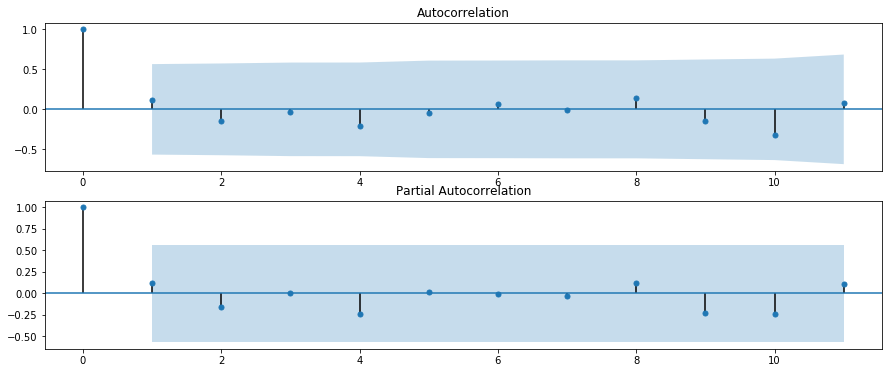

[ 0.76  0.68  0.46  0.26  0.13  0.11  0.1   0.12  0.18  0.25  0.39  0.49
  0.61  0.51  0.32  0.19  0.14  0.1   0.09  0.11  0.13  0.22  0.39  0.48
  0.66  0.61  0.44  0.27  0.14  0.1   0.1   0.11  0.15  0.24  0.39  0.58
  0.74  0.67  0.51  0.25  0.13  0.1   0.11  0.12  0.19  0.26  0.44  0.57]
[ 0.76  0.68  0.46  0.26  0.13  0.11  0.1   0.12  0.18  0.25  0.39  0.49
  0.61  0.51  0.32  0.19  0.14  0.1   0.09  0.11  0.13  0.22  0.39  0.48
  0.66  0.61  0.44  0.27  0.14  0.1   0.1   0.11  0.15  0.24  0.39  0.58]
[ 0.74  0.67  0.51  0.25  0.13  0.1   0.11  0.12  0.19  0.26  0.44  0.57]
predicted=0.673425, expected=0.740000
predicted=0.768447, expected=0.670000
predicted=0.496727, expected=0.510000
predicted=0.306213, expected=0.250000
predicted=0.030437, expected=0.130000
predicted=0.082563, expected=0.100000
predicted=0.142269, expected=0.110000
predicted=0.182872, expected=0.120000
predicted=0.186820, expected=0.190000
predicted=0.288600, expected=0.260000
predicted=0.336550, expected=0.44

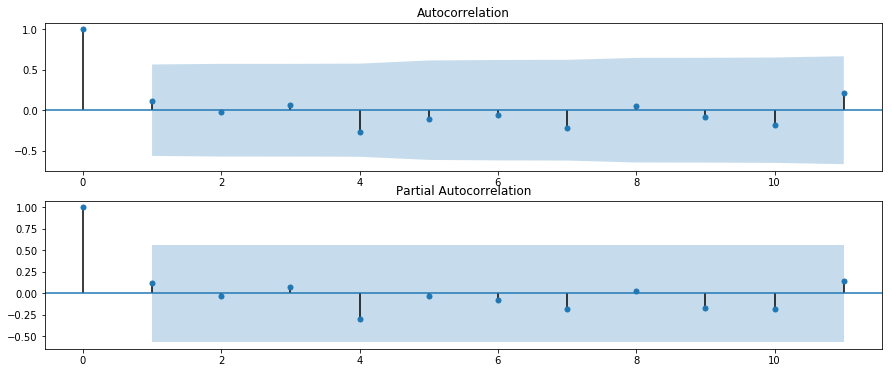

[ 0.61  0.51  0.32  0.19  0.14  0.1   0.09  0.11  0.13  0.22  0.39  0.48
  0.66  0.61  0.44  0.27  0.14  0.1   0.1   0.11  0.15  0.24  0.39  0.58
  0.74  0.67  0.51  0.25  0.13  0.1   0.11  0.12  0.19  0.26  0.44  0.57
  0.71  0.83  0.49  0.27  0.15  0.1   0.1   0.12  0.18  0.29  0.35  0.45]
[ 0.61  0.51  0.32  0.19  0.14  0.1   0.09  0.11  0.13  0.22  0.39  0.48
  0.66  0.61  0.44  0.27  0.14  0.1   0.1   0.11  0.15  0.24  0.39  0.58
  0.74  0.67  0.51  0.25  0.13  0.1   0.11  0.12  0.19  0.26  0.44  0.57]
[ 0.71  0.83  0.49  0.27  0.15  0.1   0.1   0.12  0.18  0.29  0.35  0.45]
predicted=0.609003, expected=0.710000
predicted=0.726946, expected=0.830000
predicted=0.811723, expected=0.490000
predicted=0.136922, expected=0.270000
predicted=0.112899, expected=0.150000
predicted=0.112639, expected=0.100000
predicted=0.132931, expected=0.100000
predicted=0.170805, expected=0.120000
predicted=0.197968, expected=0.180000
predicted=0.270394, expected=0.290000
predicted=0.387014, expected=0.35

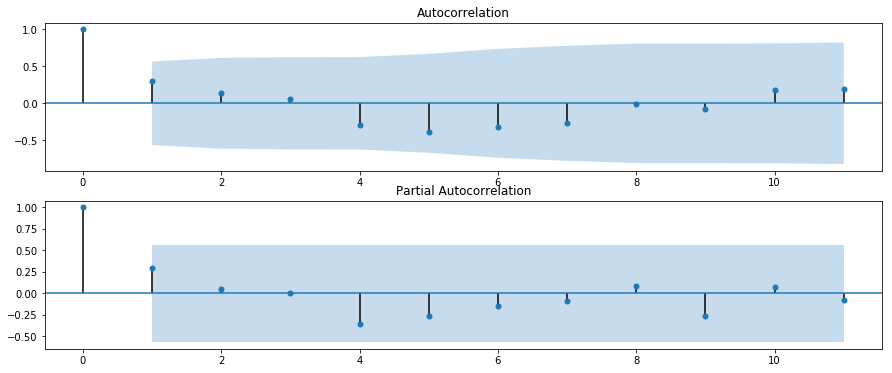

[ 0.66  0.61  0.44  0.27  0.14  0.1   0.1   0.11  0.15  0.24  0.39  0.58
  0.74  0.67  0.51  0.25  0.13  0.1   0.11  0.12  0.19  0.26  0.44  0.57
  0.71  0.83  0.49  0.27  0.15  0.1   0.1   0.12  0.18  0.29  0.35  0.45
  0.63  0.62  0.38  0.26  0.16  0.1   0.08  0.11  0.15  0.25  0.35  0.59]
[ 0.66  0.61  0.44  0.27  0.14  0.1   0.1   0.11  0.15  0.24  0.39  0.58
  0.74  0.67  0.51  0.25  0.13  0.1   0.11  0.12  0.19  0.26  0.44  0.57
  0.71  0.83  0.49  0.27  0.15  0.1   0.1   0.12  0.18  0.29  0.35  0.45]
[ 0.63  0.62  0.38  0.26  0.16  0.1   0.08  0.11  0.15  0.25  0.35  0.59]
predicted=0.494513, expected=0.630000
predicted=0.690321, expected=0.620000
predicted=0.526664, expected=0.380000
predicted=0.170114, expected=0.260000
predicted=0.192889, expected=0.160000


/home/user/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/user/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.139688, expected=0.100000
predicted=0.128673, expected=0.080000
predicted=0.144019, expected=0.110000
predicted=0.202039, expected=0.150000
predicted=0.234924, expected=0.250000
predicted=0.351599, expected=0.350000
predicted=0.420644, expected=0.590000
               0
count  12.000000
mean   -0.250715
std     0.100794
min    -0.364499
25%    -0.310426
50%    -0.253801
75%    -0.237941
max     0.034253


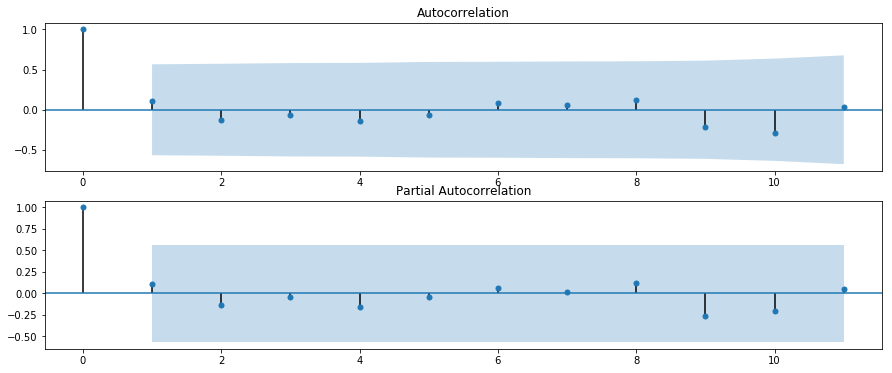

[ 0.74  0.67  0.51  0.25  0.13  0.1   0.11  0.12  0.19  0.26  0.44  0.57
  0.71  0.83  0.49  0.27  0.15  0.1   0.1   0.12  0.18  0.29  0.35  0.45
  0.63  0.62  0.38  0.26  0.16  0.1   0.08  0.11  0.15  0.25  0.35  0.59
  0.61  0.52  0.47  0.23  0.16  0.12  0.1   0.12  0.16  0.28  0.37  0.52]
[ 0.74  0.67  0.51  0.25  0.13  0.1   0.11  0.12  0.19  0.26  0.44  0.57
  0.71  0.83  0.49  0.27  0.15  0.1   0.1   0.12  0.18  0.29  0.35  0.45
  0.63  0.62  0.38  0.26  0.16  0.1   0.08  0.11  0.15  0.25  0.35  0.59]
[ 0.61  0.52  0.47  0.23  0.16  0.12  0.1   0.12  0.16  0.28  0.37  0.52]
predicted=0.700509, expected=0.610000
predicted=0.539161, expected=0.520000
predicted=0.393533, expected=0.470000
predicted=0.394400, expected=0.230000
predicted=0.080800, expected=0.160000
predicted=0.165638, expected=0.120000
predicted=0.158496, expected=0.100000
predicted=0.156727, expected=0.120000
predicted=0.198059, expected=0.160000
predicted=0.238733, expected=0.280000
predicted=0.382236, expected=0.37

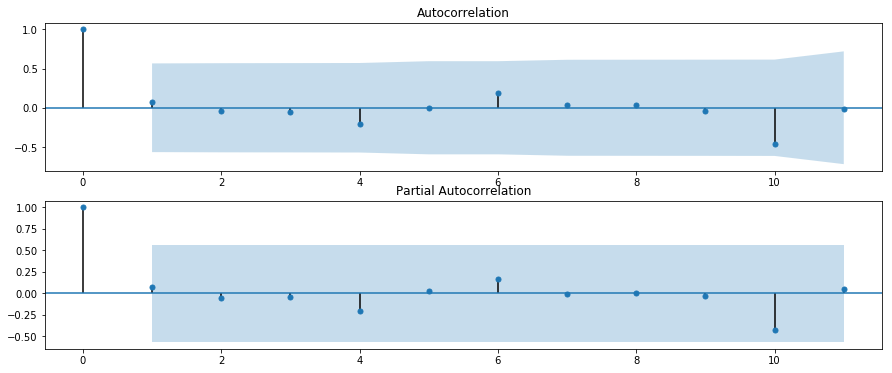

In [7]:
Month1 = series['Month'].values
i=0
pred=list()
for j in range(15):
    X = series['Fuel Oil Consumption'].values
    n=list()
    n=X[i:48+i]
    print(n)
    size = int(len(n) * 0.77)
    train,test = X[0+i:size+i],X[size+i:len(n)+i]
    print(train)
    print(test)
    i=i+12
    # create a differenced series
    def difference(train, interval=1):
        diff = list()
        for k in range(interval, len(train)):
            value = train[i] - train[i - interval]
            diff.append(value)
            return diff
    # invert differenced value
    def inverse_difference(history, yhat, interval=1):
        return yhat + history[-interval]
    history = [x for x in train]
    predictions = list()
    expected=list()
    test1=list()
    for t in range(len(test)):
        #Month2=series['Month'].values[36+i:len(n)]
        model = ARIMA(history, order=(2,0,0))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        obs = test[t]
        expected.append(obs)
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs)) 
        pred.append(yhat[0])
    residuals = [test[k]-pred[k] for k in range(len(test))]
    residuals = DataFrame(residuals)
    print(residuals.describe())
    # plot
    pyplot.figure()
    pyplot.subplot(211)
    plot_acf(residuals, ax=pyplot.gca())
    pyplot.subplot(212)
    plot_pacf(residuals, ax=pyplot.gca())
    pyplot.show()

In [ ]:
print(pred)

In [ ]:
X1= series['Fuel Oil Consumption'].values
size1 = int(len(X1) * 0.77)
train1,test1 = X1[0:size1], X1[size1:len(X1)]

In [ ]:
len(test)

In [ ]:
pred1=list()
pred1=pred[168:]

In [ ]:
len(pred1)

In [ ]:
error= mean_squared_error(test, pred1)
print('Test MSE: %.3f' % error)

In [ ]:
pyplot.title('ARIMA FUTURE VALUE PREDICTION-order(2,0,0)')
Month1 = series['Month'].values
#print(Month1)
Month2 = series['Month'].values[36:]
#print(Month2)
hist=series['Fuel Oil Consumption'].values
#Month3 = series['Month'].values
#Month4 = series['Month'].values[36:]
pyplot.plot(Month1,hist,label='Actual')
pyplot.plot(Month2,pred,'r--',label='Predicted')
#pyplot.plot(Month3,history1,label='Actual1')
#pyplot.plot(Month4,predictions1,'r--',label='Predicted1')
#print(pred)
print(len(hist))
print(len(pred))
print(pred.index)
pyplot.xlabel('Month')
pyplot.ylabel('Fuel Oil Consumption')
pyplot.show()
#pred.append(predictions)
# pyplot.plot(Month1,history,label='Actual')

In [ ]:
with open("output2.csv", 'w') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    wr.writerow(pred)